## Introduction

In this project, we will take a look at vaccination, a key public health measure used to fight infectious diseases. Vaccines provide immunization for individuals, and enough immunization in a community can further reduce the spread of diseases through "herd immunity."

Beginning in spring 2009, a pandemic caused by the H1N1 influenza virus, colloquially named "swine flu," swept across the world. Researchers estimate that in the first year, it was responsible for between 151,000 to 575,000 deaths globally.

A vaccine for the H1N1 flu virus became publicly available in October 2009. In late 2009 and early 2010, the United States conducted the National 2009 H1N1 Flu Survey. This phone survey asked respondents whether they had received the H1N1 and seasonal flu vaccines, in conjunction with questions about themselves. These additional questions covered their social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission. A better understanding of how these characteristics are associated with personal vaccination patterns can provide guidance for future public health efforts.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import interpolate

In [4]:
training_set_features = pd.read_csv('training_set_features.csv')
test_set_features = pd.read_csv('test_set_features.csv')
training_set_labels = pd.read_csv('training_set_labels.csv')
df = training_set_features.merge(training_set_labels,on='respondent_id',how='left')

In [5]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [6]:
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [7]:
df.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [10]:
df = df.drop(['employment_industry','employment_occupation','hhs_geo_region','employment_industry',
             'employment_occupation'],axis=1)

In [11]:
df = df.astype({"education":'category',"marital_status":'category',
                                    "rent_or_own":'category',"employment_status":'category',"census_msa":'category',
                         "race":'category',"sex":'category',"income_poverty":'category',"age_group":'category'})
df["education_cat"] = df["education"].cat.codes
df["marital_status_cat"] = df["marital_status"].cat.codes
df["rent_or_own_cat"] = df["rent_or_own"].cat.codes
df["employment_status_cat"] = df["employment_status"].cat.codes
df["census_msa_cat"] = df["census_msa"].cat.codes
df["race_cat"] = df["race"].cat.codes
df["sex_cat"] = df["sex"].cat.codes
df["income_poverty_cat"] = df["income_poverty"].cat.codes
df["age_group_cat"] = df["age_group"].cat.codes
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,seasonal_vaccine,education_cat,marital_status_cat,rent_or_own_cat,employment_status_cat,census_msa_cat,race_cat,sex_cat,income_poverty_cat,age_group_cat
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,1,1,0,1,2,3,0,2,3
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1,0,1,1,0,0,3,1,2,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,2,1,0,0,0,3,1,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,0,1,1,1,1,3,0,2,4
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,3,0,0,0,0,3,0,0,2


In [12]:
df = df.drop(["education","marital_status","rent_or_own","employment_status","census_msa","race","sex",
                      "income_poverty","age_group"],axis=1)


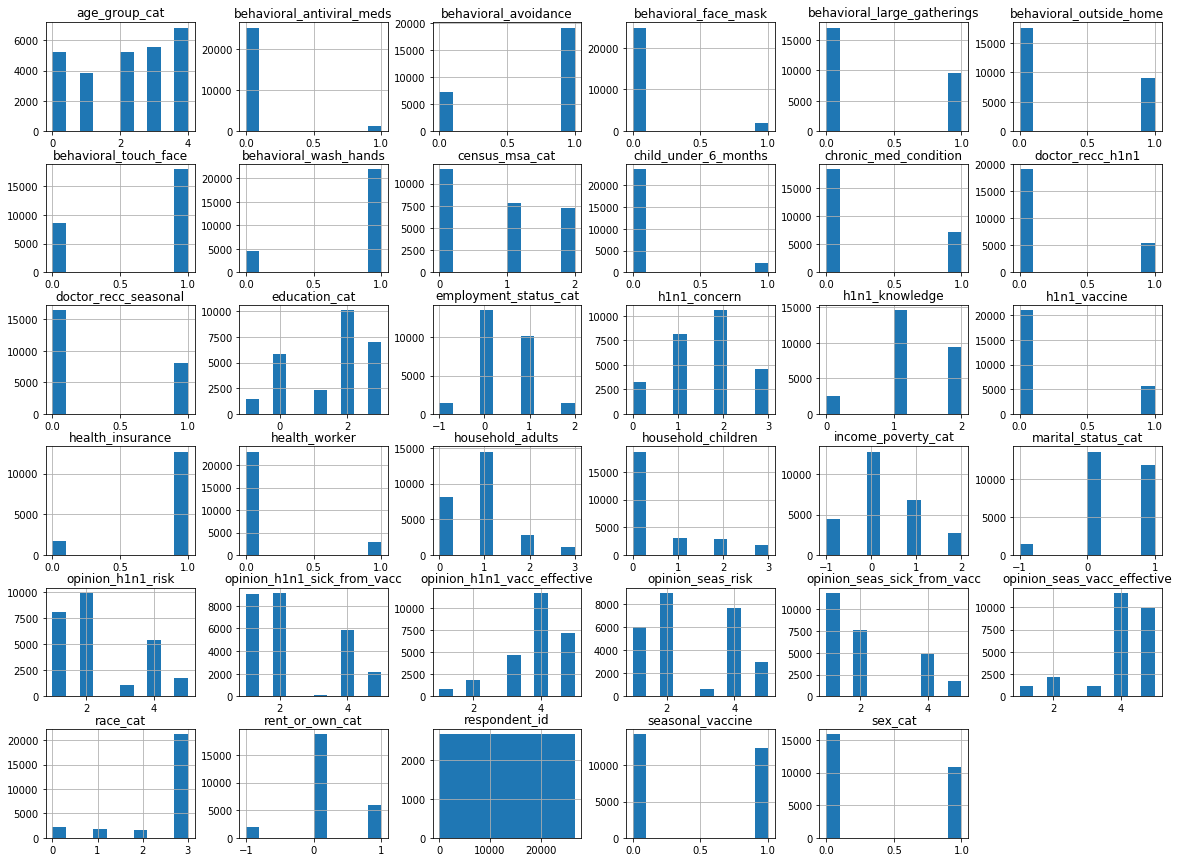

In [14]:
df.hist(figsize=(20,15))
plt.show()

In [177]:
df = X_train.merge(y_train,on='respondent_id',how='left')

In [16]:
df.drop(df[df.rent_or_own_cat < 0].index, inplace=True)
df.drop(df[df.employment_status_cat < 0].index, inplace=True)
df.drop(df[df.marital_status_cat < 0].index, inplace=True)
df.drop(df[df.education_cat < 0].index, inplace=True)

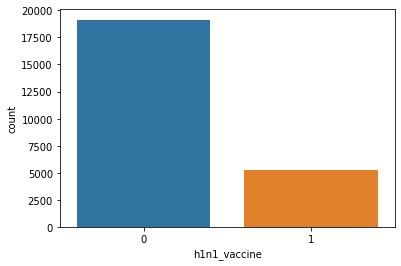

In [17]:
sns.countplot(x='h1n1_vaccine',data=df)
plt.show()

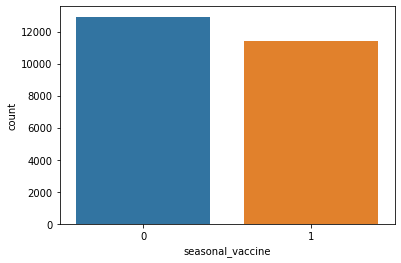

In [18]:
sns.countplot(x='seasonal_vaccine',data=df)
plt.show()

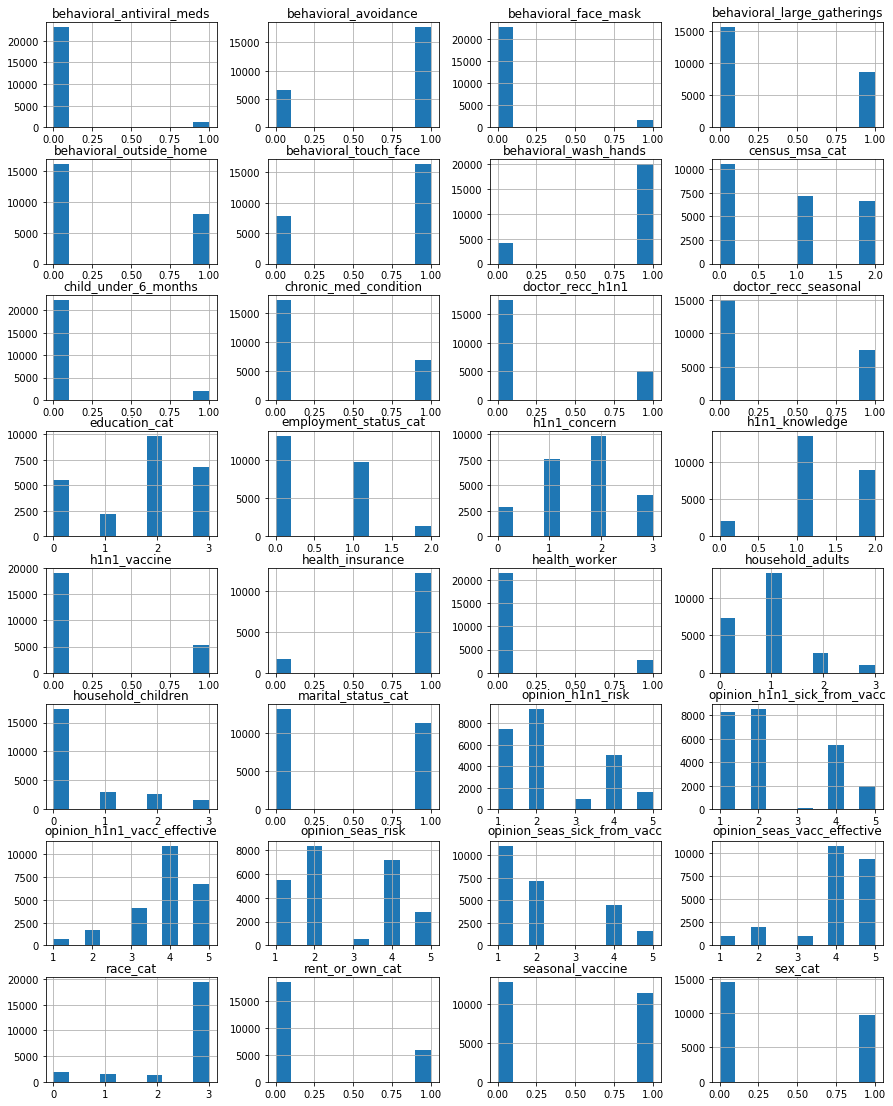

In [19]:
df.iloc[:,1:33].hist( figsize=(15, 22), layout=(9, 4));

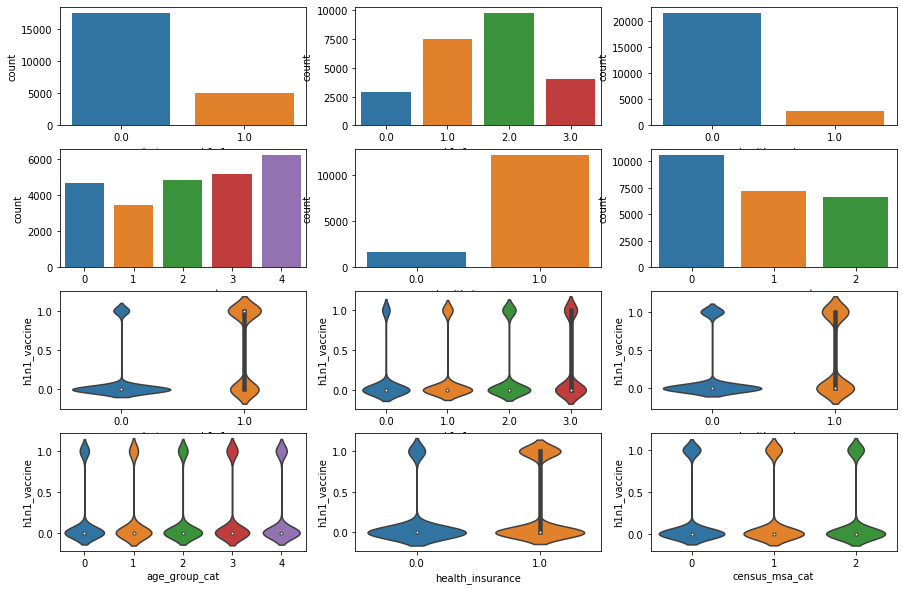

In [20]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(4,3,1)
sns.countplot(data = df, x = 'doctor_recc_h1n1', ax=ax1)

ax2 = fig.add_subplot(4,3,2)
sns.countplot(data = df, x = 'h1n1_concern', ax=ax2)

ax3 = fig.add_subplot(4,3,3)
sns.countplot(data = df, x = 'health_worker', ax=ax3)

ax4 = fig.add_subplot(4,3,4)
sns.countplot(data = df, x = 'age_group_cat', ax=ax4)

ax5 = fig.add_subplot(4,3,5)
sns.countplot(data = df, x = 'health_insurance', ax=ax5)

ax6 = fig.add_subplot(4,3,6)
sns.countplot(data = df, x = 'census_msa_cat', ax=ax6)


ax7 = fig.add_subplot(4,3,7)
#sns.boxplot(data = df, x = 'doctor_recc_h1n1', y = 'h1n1_vaccine' , ax=ax7)
sns.violinplot(data = df, x = 'doctor_recc_h1n1', y = 'h1n1_vaccine', ax = ax7)

ax8 = fig.add_subplot(4,3,8)
#sns.boxplot(data = df, x = 'h1n1_concern', y = 'h1n1_vaccine', ax=ax8)
sns.violinplot(data = df, x = 'h1n1_concern', y = 'h1n1_vaccine', ax = ax8)

ax9 = fig.add_subplot(4,3,9)
#sns.boxplot(data = df, x = 'health_worker', y = 'h1n1_vaccine', ax=ax9)
sns.violinplot(data = df, x = 'health_worker', y = 'h1n1_vaccine', ax = ax9)

ax10 = fig.add_subplot(4,3,10)
#sns.boxplot(data = df, x = 'doctor_recc_h1n1', y = 'h1n1_vaccine' , ax=ax10)
sns.violinplot(data = df, x = 'age_group_cat', y = 'h1n1_vaccine', ax = ax10)

ax11 = fig.add_subplot(4,3,11)
#sns.boxplot(data = df, x = 'h1n1_concern', y = 'h1n1_vaccine', ax=ax11)
sns.violinplot(data = df, x = 'health_insurance', y = 'h1n1_vaccine', ax = ax11)

ax12 = fig.add_subplot(4,3,12)
#sns.boxplot(data = df, x = 'health_worker', y = 'h1n1_vaccine', ax=ax12)
sns.violinplot(data = df, x = 'census_msa_cat', y = 'h1n1_vaccine', ax = ax12)
